## Case Study: Weather Influence on Energy Consumption of a Building

**Aim of study**: To find out how the weather influence the energy consumption in "UnivClass_Ciara" building

**Dataset:**

Building Data Genome Project 1 - Hourly (Electrical Meter Data from Non-residential Buildings)

Another corresponding dataset for weather conditions around building and metadata("all_buildings_meta_data") to find corresponding weather data file name.

**License**: CC BY-SA 4.0

**Dataset Author**: [Clayton Miller](https://www.kaggle.com/claytonmiller)

**Key Metrics To Check:** 
1. Temperature vs Energy Consumption 
2. Humidity vs Energy Consumption 

**Tools Used**: 
Jupyter Notebook for Python. Libraries: Pandas, Matplotlib, and Seaborn

In [1]:
#importing libraries
import pandas as pd 
import os

The 'building-data-genome-project-v1' contains hourly time-series energy consumption data for whole year for each building. There is data of such 557 buildings. In this case study I have analyzed one such building called "UnivClass_Ciara". The hourly time-series meter data for entire year is available in the CSV file. The corresponding weather conditions data is uploaded. Metadata for the buildings is also uploaded.

In [2]:
#reading UnivClass_Ciara meter data
meter_data = pd.read_csv("/kaggle/input/building-data-genome-project-v1/UnivClass_Ciara.csv")
meter_data.head(5)

,timestamp,UnivClass_Ciara
0,2015-01-01 00:00:00,136.824997
1,2015-01-01 01:00:00,144.025002
2,2015-01-01 02:00:00,144.875000
3,2015-01-01 03:00:00,142.375000
4,2015-01-01 04:00:00,148.199997


Making timestamp column as index and parsing dates

In [3]:
meter_data = pd.read_csv("/kaggle/input/building-data-genome-project-v1/UnivClass_Ciara.csv",parse_dates = True, index_col ="timestamp")
meter_data.head(5)

,UnivClass_Ciara
timestamp,
2015-01-01 00:00:00,136.824997
2015-01-01 01:00:00,144.025002
2015-01-01 02:00:00,144.875000
2015-01-01 03:00:00,142.375000
2015-01-01 04:00:00,148.199997


Plotting the line graph for meter data

<AxesSubplot:xlabel='timestamp'>

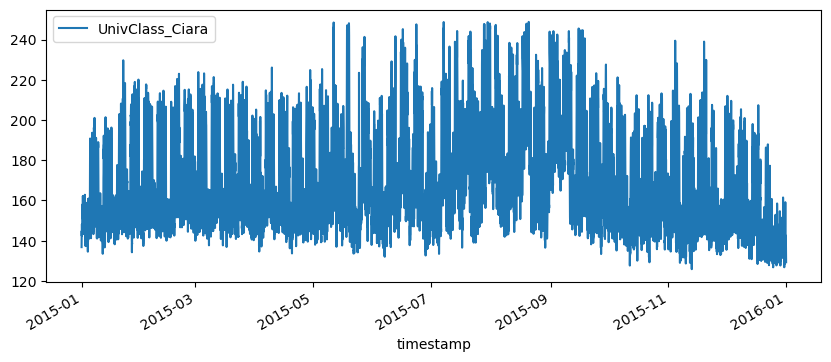

In [4]:
meter_data.plot(figsize=(10,4))

Before proceding we will need to find out name of corresponding "weather" condition file to "UnivClass_Ciara" which is available in metadata

In [5]:
#Let's load all_building_meta_data first
metadata = pd.read_csv("/kaggle/input/buildings-energy-consumption-metadata/all_buildings_meta_data.csv",index_col='uid')
metadata.head(5)

,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
uid,,,,,,,,,,,,,,,,,,
PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv


In [6]:
#Let's locate the weather file name for "UnivClass_Ciara"
metadata.loc["UnivClass_Ciara"]["newweatherfilename"]

'weather2.csv'

The corresponding weather data is in weather2.csv file. 
Uploaded 'weather2.csv' file

In [7]:
#reading weather data at "UnivClass_Ciara" location
weather_data = pd.read_csv("/kaggle/input/weather2/weather2.csv", index_col = "timestamp", parse_dates = True)
weather_data.head(5)

,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
timestamp,,,,,,,,,,,,,,,,
2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,NaN,12:56 AM,16.1,SW,18.5,230,2015-01-01 00:56:00
2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,1:56 AM,16.1,WSW,14.8,240,2015-01-01 01:56:00
2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,NaN,2:56 AM,16.1,SW,14.8,220,2015-01-01 02:56:00
2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,3:56 AM,16.1,SW,18.5,220,2015-01-01 03:56:00
2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,4:56 AM,16.1,SSW,14.8,210,2015-01-01 04:56:00


In [8]:
weather_data.columns

Index(['Conditions', 'DateUTC<br />', 'Dew PointC', 'Events', 'Gust SpeedKm/h',
       'Humidity', 'Precipitationmm', 'Sea Level PressurehPa', 'TemperatureC',
       'TimeEDT', 'TimeEST', 'VisibilityKm', 'Wind Direction',
       'Wind SpeedKm/h', 'WindDirDegrees', 'timestamp.1'],
      dtype='object')

In [9]:
#dropping the columns which are not required in this study

drop_columns = ['Conditions', 'DateUTC<br />', 'Dew PointC', 'Events', 'Gust SpeedKm/h',
        'Precipitationmm', 'Sea Level PressurehPa',
       'TimeEDT', 'TimeEST', 'VisibilityKm', 'Wind Direction',
       'Wind SpeedKm/h', 'WindDirDegrees', 'timestamp.1']
weather_data= weather_data.drop(columns = drop_columns)
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10914 entries, 2015-01-01 00:56:00 to 2015-12-31 21:56:00
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      10878 non-null  float64
 1   TemperatureC  10914 non-null  float64
dtypes: float64(2)
memory usage: 255.8 KB


In [10]:
weather_data.head(5)

,Humidity,TemperatureC
timestamp,,
2015-01-01 00:56:00,54.0,-7.2
2015-01-01 01:56:00,55.0,-6.6
2015-01-01 02:56:00,55.0,-6.6
2015-01-01 03:56:00,55.0,-6.6
2015-01-01 04:56:00,55.0,-6.6


Let's plot each parameter with respect to time

<AxesSubplot:xlabel='timestamp'>

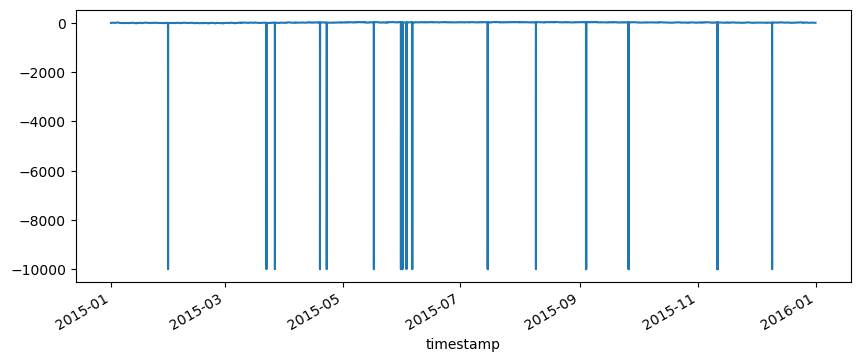

In [11]:
weather_data["TemperatureC"].plot(figsize= (10,4))

There exists outliers because -10000 degrees celcius temperature on earth is impossible.

Before cleaning this outlier let's check other parameters first.

<AxesSubplot:xlabel='timestamp'>

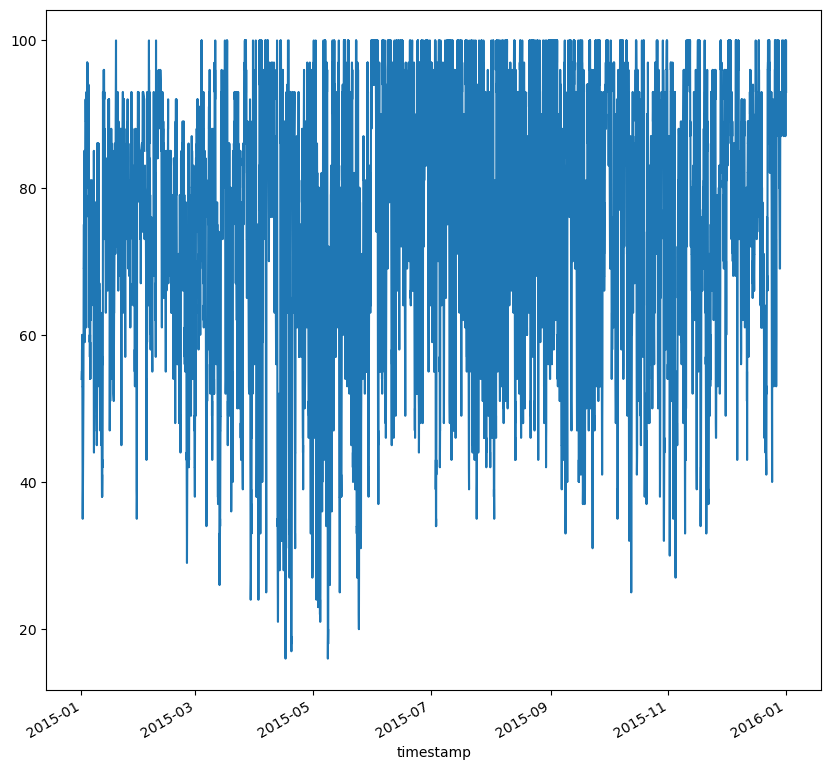

In [12]:
weather_data["Humidity"].plot(figsize= (10,10)) #plotting humidity vs temperature

First resampling the timeseries data by hours

In [13]:
weather_hourly = weather_data.resample("H").mean()
weather_hourly.head(5)

,Humidity,TemperatureC
timestamp,,
2015-01-01 00:00:00,54.0,-7.2
2015-01-01 01:00:00,55.0,-6.6
2015-01-01 02:00:00,55.0,-6.6
2015-01-01 03:00:00,55.0,-6.6
2015-01-01 04:00:00,55.0,-6.6


In [14]:
weather_hourly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      8564 non-null   float64
 1   TemperatureC  8567 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


Cleaning temperature data to remove outliers

In [15]:
weather_hourly_clean = weather_hourly[weather_hourly>-40]
weather_hourly_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      8564 non-null   float64
 1   TemperatureC  8544 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


By filtering data which is smaller than -40 degrees celcius the outliers have been removed. Before removing outliers there were 8567 rows and after removing the outliers they were 8544. But the gap created in the data after removing outliers needs to filled. Using fillna function.

In [16]:
weather_hourly_clean= weather_hourly_clean.fillna(method='ffill')
weather_hourly_clean.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8758 entries, 2015-01-01 00:00:00 to 2015-12-31 21:00:00
Freq: H
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      8758 non-null   float64
 1   TemperatureC  8758 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


<AxesSubplot:xlabel='timestamp'>

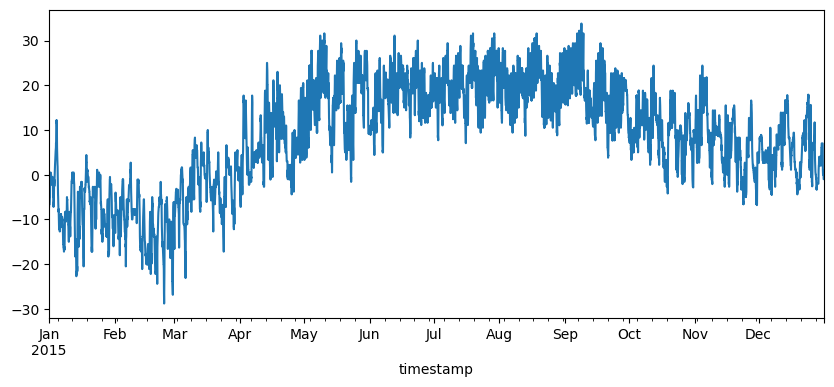

In [17]:
#plot clean data
weather_hourly_clean["TemperatureC"].plot(figsize=(10,4))

In [18]:
weather_hourly_clean.to_csv("weather_hourly_clean.csv")

Let's merge meter data and temperature data for comparison

In [19]:
temp_vs_meter_data = pd.merge(weather_hourly_clean["TemperatureC"],meter_data['UnivClass_Ciara'],left_index=True,right_index=True,how='outer')
temp_vs_meter_data.head(5)

,TemperatureC,UnivClass_Ciara
timestamp,,
2015-01-01 00:00:00,-7.2,136.824997
2015-01-01 01:00:00,-6.6,144.025002
2015-01-01 02:00:00,-6.6,144.875000
2015-01-01 03:00:00,-6.6,142.375000
2015-01-01 04:00:00,-6.6,148.199997


In [20]:
temp_vs_meter_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8761 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TemperatureC     8759 non-null   float64
 1   UnivClass_Ciara  8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


array([<AxesSubplot:xlabel='timestamp'>, <AxesSubplot:xlabel='timestamp'>],
      dtype=object)

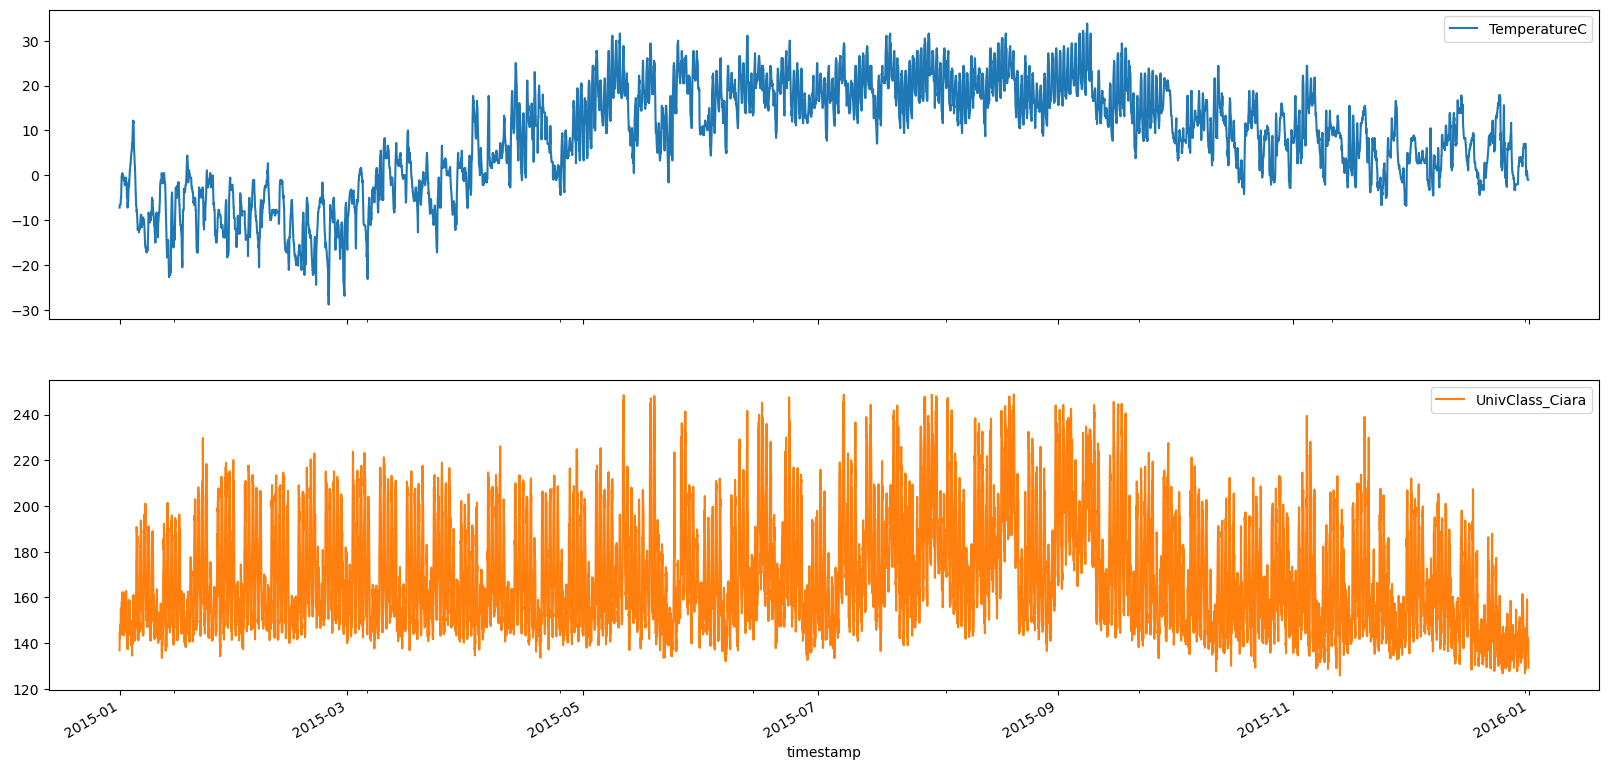

In [21]:
temp_vs_meter_data.plot(figsize=(20,10),subplots = True)

<AxesSubplot:xlabel='TemperatureC', ylabel='UnivClass_Ciara'>

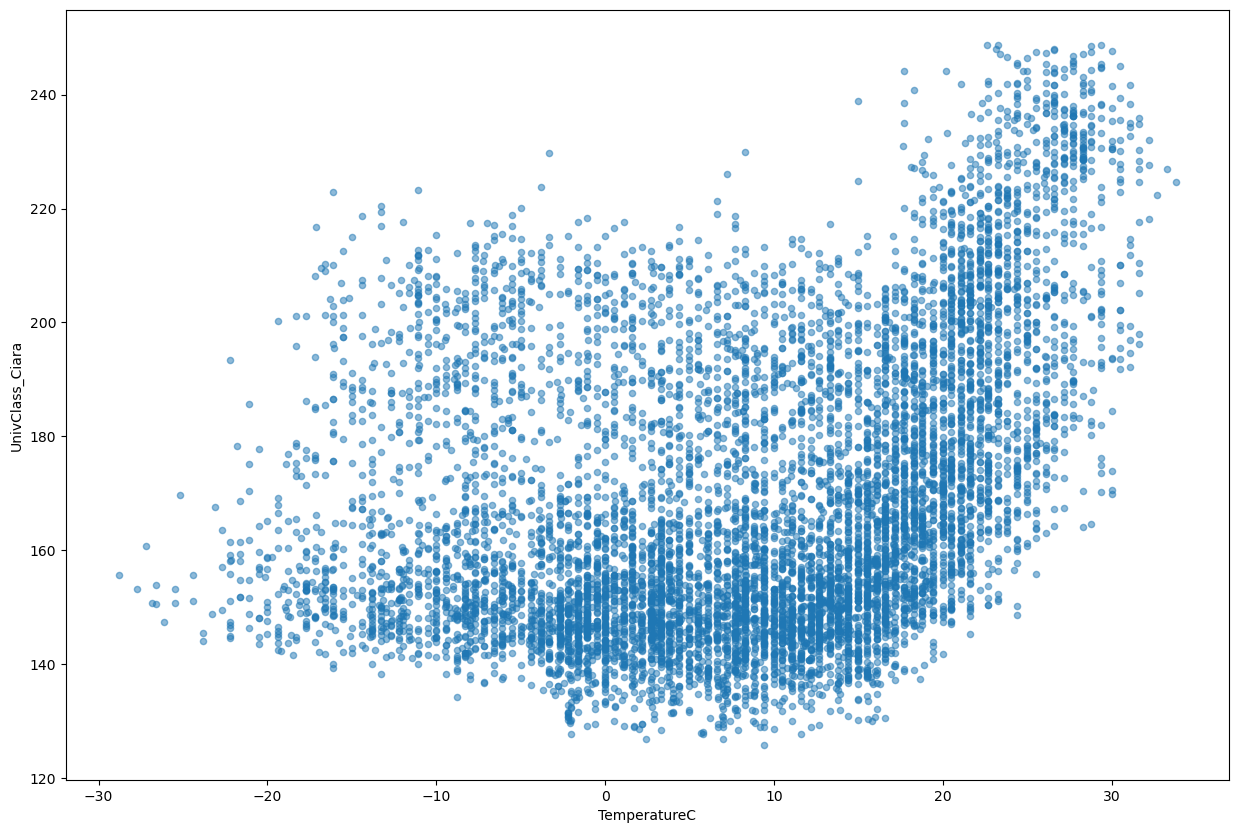

In [22]:
temp_vs_meter_data.plot(kind="scatter",x = "TemperatureC",y="UnivClass_Ciara",alpha= 0.5,figsize=(15,10))

In [23]:
import seaborn as sns
def make_color_division(x): #creating a function to create new column and then use as hue in the plot
    if x<14:
        return "Heating"
    else:
        return "Cooling"

temp_vs_meter_data.resample("D").mean() #resampling the data
temp_vs_meter_data['Heating_vs_Cooling'] = temp_vs_meter_data.TemperatureC.apply(lambda x: make_color_division(x)) #applying the function to combined data
temp_vs_meter_data.sample(frac=0.5) #checking random sample for new column

,TemperatureC,UnivClass_Ciara,Heating_vs_Cooling
timestamp,,,
2015-03-02 13:00:00,-3.800000,211.574997,Heating
2015-01-21 08:00:00,-15.000000,188.224998,Heating
2015-10-28 08:00:00,8.300000,186.174995,Heating
2015-10-22 02:00:00,16.600000,130.625000,Cooling
2015-12-04 04:00:00,3.300000,151.574997,Heating
...,...,...,...
2015-09-03 05:00:00,17.200000,182.524994,Cooling
2015-12-16 15:00:00,5.600000,191.675003,Heating
2015-01-04 14:00:00,12.100000,154.799995,Heating


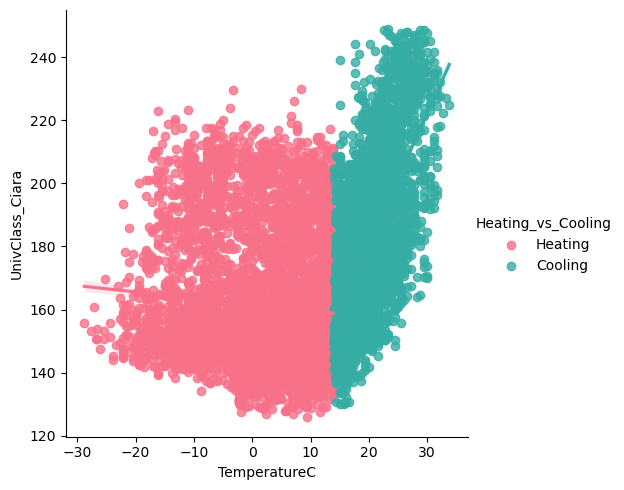

In [24]:
g= sns.lmplot(x="TemperatureC",y="UnivClass_Ciara",hue="Heating_vs_Cooling",data=temp_vs_meter_data,truncate=True,palette="husl")

<AxesSubplot:xlabel='TemperatureC', ylabel='UnivClass_Ciara'>

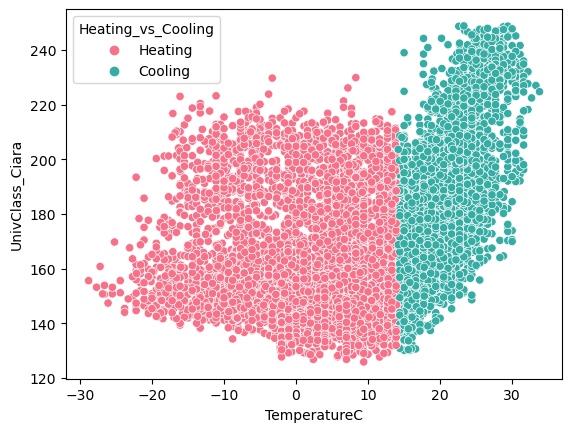

In [25]:
sns.scatterplot(x="TemperatureC",y="UnivClass_Ciara",hue="Heating_vs_Cooling",data=temp_vs_meter_data,palette = "husl")

Clearly the energy consumption during cooling phase is more than during heating phase.

#### Using similar code for Humidity.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8761 entries, 2015-01-01 00:00:00 to 2015-12-31 23:00:00
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Humidity         8759 non-null   float64
 1   UnivClass_Ciara  8760 non-null   float64
dtypes: float64(2)
memory usage: 205.3 KB


<AxesSubplot:xlabel='Humidity', ylabel='UnivClass_Ciara'>

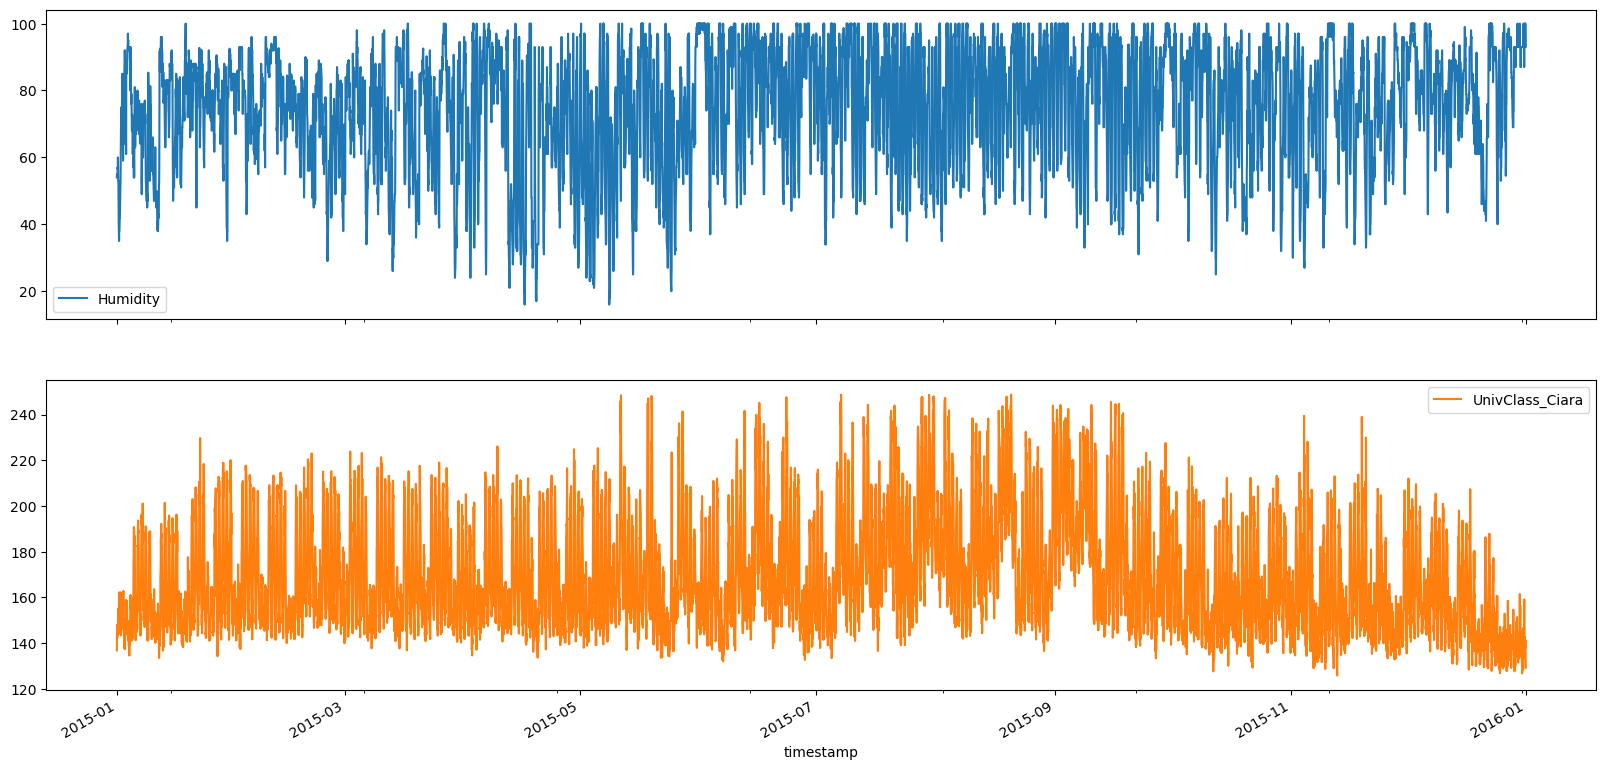

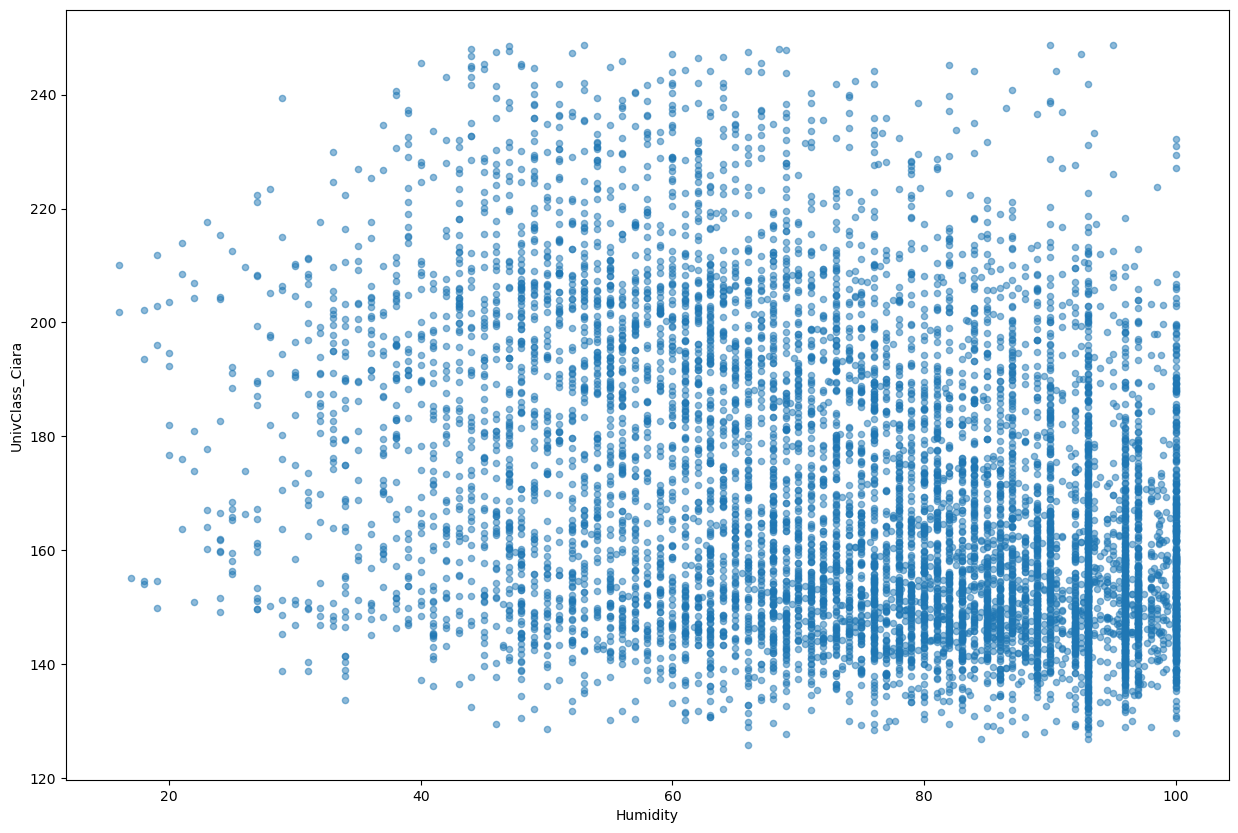

In [26]:
humidity_vs_meter_data = pd.merge(weather_hourly_clean["Humidity"],meter_data['UnivClass_Ciara'],left_index=True,right_index=True,how='outer')
humidity_vs_meter_data.head(5)

humidity_vs_meter_data.info()

humidity_vs_meter_data.plot(figsize=(20,10),subplots = True)
humidity_vs_meter_data.resample("D").mean() #resampling the data
humidity_vs_meter_data.plot(kind="scatter",x = "Humidity",y="UnivClass_Ciara",alpha= 0.5,figsize=(15,10))

There is no direct correlation between humidity and energy consumption